In [1]:
import math 
import re

import numpy as np
import pandas as pd
from IPython.display import display, HTML

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle
from matplotlib.collections import PatchCollection
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick

#import seaborn as sns

#from sklearn.decomposition import PCA

import sqlite3
import json

%matplotlib inline

In [2]:
# Utility Functions and Classes
def digit_cnt(n):
    if n > 0:
        return int(math.log10(n))+1
    elif n == 0:
        return 1
    elif n < 0:
        return int(math.log10(-n))+2
    
# Plotting
def colorFromBivariateData(Z1,Z2,A1,A2,cmap1 = plt.cm.RdBu, cmap2 = plt.cm.PRGn):
    # Rescale values to fit into colormap range (0->255)
    Z1_plot = np.array(255*(Z1-A1.min())/(A1.max()-A1.min()), dtype=int)
    Z2_plot = np.array(255*(Z2-A2.min())/(A2.max()-A2.min()), dtype=int)
    #Z1_plot = np.array(255*(Z1-4.1)/(Z1.max()-Z1.min()), dtype=np.int)
    #Z2_plot = np.array(255*(Z2-9.2)/(Z2.max()-Z2.min()), dtype=np.int)

    Z1_color = cmap1(Z1_plot)
    Z2_color = cmap2(Z2_plot)

    # Color for each point
    Z_color = np.sum([Z1_color, Z2_color], axis=0)/2.0

    return Z_color, np.vstack((Z1_plot/255, Z2_plot/255))


In [3]:
con = sqlite3.connect("/home/skye/Documents/Scripts/FRC/2022/scouting/cblite/wildrank.cblite2/db.sqlite3")

In [4]:
cursor = con.cursor()

In [5]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('docs',), ('revs',), ('sqlite_sequence',), ('localdocs',), ('views',), ('info',), ('maps_1',), ('sqlite_stat1',)]


In [6]:
# TBA Retrieved Data
cursor.execute("SELECT json FROM revs where doc_type = 'match' AND doc_id=1")
col_names = list(map(lambda x: x[0], cursor.description))
print(col_names)
print(cursor.fetchall())

df_tba_results = pd.read_sql_query("SELECT json FROM revs where doc_type = 'match'", con)
df_tba_results_e = df_tba_results.join(df_tba_results['json'].apply(json.loads).apply(pd.Series))
df_tba_results_e = df_tba_results_e.sort_values(by=['time'],ignore_index=True).reset_index(drop=True)
#df_tba_results_alliances = pd.DataFrame.from_dict(df_tba_results_e['alliances'])
df_tba_results_alliances = pd.concat({k: pd.DataFrame(v).T for k, v in df_tba_results_e['alliances'].items()}, axis=0)
df_tba_results_alliances = pd.DataFrame(df_tba_results_alliances['team_keys'])

df_tba_results_alliances[['team1','team2','team3']] = pd.DataFrame(df_tba_results_alliances['team_keys'].tolist(), index= df_tba_results_alliances.index)
all_teams = pd.unique(df_tba_results_alliances[['team1','team2','team3']].values.ravel('K'))
display(HTML(df_tba_results_alliances.to_html()))
#print(all_teams)

team_matches = {}
for team in all_teams:
    select_indices = list(np.where((df_tba_results_alliances["team1"] == team) | \
                                   (df_tba_results_alliances["team2"] == team) | \
                                   (df_tba_results_alliances["team3"] == team))[0])
    #select_indices = [l%2 for l in select_indices]
    team_matches[team] = select_indices
df_alliance_color = pd.DataFrame(team_matches).T
#df_alliance_color.replace({0: 'red', 1: 'blue'}, inplace=True) 
display(HTML(df_alliance_color.to_html()))

['json']
[]


,0,1,2,3,4,5,6,7,8,9,10,11
frc5980,0,15,25,31,49,55,71,78,85,100,108,116
frc5110,1,14,23,33,45,52,62,73,88,95,108,114
frc1940,2,21,29,37,46,55,64,76,93,102,111,122
frc2959,3,13,21,32,50,57,64,75,88,100,109,117
frc74,4,19,28,35,43,52,64,79,84,94,113,120
frc4325,5,12,25,33,44,51,69,81,90,98,110,119
frc904,6,18,26,39,44,53,63,78,84,103,111,117
frc4003,7,16,22,37,42,52,63,81,87,101,106,116
frc3620,8,15,30,36,43,56,68,75,90,97,107,114
frc288,9,15,20,39,48,59,69,79,88,102,112,123


In [7]:
# Get our data
cursor.execute("SELECT json FROM revs where doc_type = 'match_result'")
df_user_results = pd.read_sql_query("SELECT json FROM revs where doc_type = 'match_result'", con)
col_names = list(map(lambda x: x[0], cursor.description))
results = cursor.fetchall()
print(col_names)
pd.options.display.max_colwidth =10000

df_user_results.head(15)



['json']


,json
0,"b'{""match_key"":""2022misjo_qm10"",""data"":{""auto-robot_contact"":false,""post_match-floor_pickup_rating"":""2"",""auto-score_cargo_low"":0,""cycles"":[{""missed_shot"":true,""defended_shot"":false,""location_1"":false,""hub_upper_score"":true,""location_8"":false,""location_6"":false,""location_7"":false,""location_4"":false,""location_5"":false,""hub_lower_score"":false,""location_2"":false,""location_3"":true},{""missed_shot"":true,""defended_shot"":false,""location_1"":false,""hub_upper_score"":true,""location_8"":false,""location_6"":false,""location_7"":false,""location_4"":true,""location_5"":false,""hub_lower_score"":false,""location_2"":false,""location_3"":false},{""missed_shot"":true,""defended_shot"":false,""location_1"":false,""hub_upper_score"":true,""location_8"":false,""location_6"":false,""location_7"":false,""location_4"":true,""location_5"":false,""hub_lower_score"":false,""location_2"":false,""location_3"":false},{""missed_shot"":false,""defended_shot"":false,""location_1"":false,""hub_upper_score"":true,""location_8"":false,""location_6"":false,""location_7"":false,""location_4"":true,""location_5"":false,""hub_lower_score"":false,""location_2"":false,""location_3"":false},{""missed_shot"":false,""defended_shot"":false,""location_1"":false,""hub_upper_score"":true,""location_8"":false,""location_6"":false,""location_7"":false,""location_4"":false,""location_5"":false,""hub_lower_score"":false,""location_2"":false,""location_3"":true},{""missed_shot"":false,""defended_shot"":false,""location_1"":false,""hub_upper_score"":true,""location_8"":false,""location_6"":false,""location_7"":false,""location_4"":false,""location_5"":false,""hub_lower_score"":false,""location_2"":false,""location_3"":true}],""auto-startLoc"":""1"",""post_match-climb_level"":""2"",""post_match-tipped"":false,""post_match-robot_speed"":""0"",""auto-score_cargo_high"":1,""auto-drive"":true,""auto-miss_cargo_low"":0,""post_match-excessive_fouls"":false,""auto-miss_cargo_high"":0,""post_match-climb_time"":""About 10sec""},""type"":""match_result"",""team_key"":""frc216"",""users"":[""2767""]}'"
1,"b'{""match_key"":""2022misjo_qm10"",""data"":{""auto-robot_contact"":false,""post_match-floor_pickup_rating"":""1"",""auto-score_cargo_low"":0,""cycles"":[],""auto-startLoc"":""2"",""post_match-climb_level"":""0"",""post_match-tipped"":false,""post_match-robot_speed"":""1"",""auto-score_cargo_high"":0,""auto-drive"":true,""auto-miss_cargo_low"":0,""post_match-excessive_fouls"":false,""auto-miss_cargo_high"":1,""post_match-climb_time"":""!No Climb""},""type"":""match_result"",""team_key"":""frc244"",""users"":[""2767""]}'"
2,"b'{""match_key"":""2022misjo_qm10"",""data"":{""auto-robot_contact"":false,""post_match-floor_pickup_rating"":""0"",""auto-score_cargo_low"":0,""cycles"":[],""auto-startLoc"":""1"",""post_match-climb_level"":""0"",""post_match-tipped"":false,""post_match-robot_speed"":""0"",""auto-score_cargo_high"":0,""auto-drive"":false,""auto-miss_cargo_low"":0,""post_match-excessive_fouls"":false,""auto-miss_cargo_high"":0,""post_match-climb_time"":""!No Climb""},""type"":""match_result"",""team_key"":""frc5056"",""users"":[""2767""]}'"
3,"b'{""match_key"":""2022misjo_qm10"",""data"":{""auto-robot_contact"":false,""post_match-floor_pickup_rating"":""2"",""auto-score_cargo_low"":1,""cycles"":[{""missed_shot"":false,""defended_shot"":false,""location_1"":false,""hub_upper_score"":false,""location_8"":false,""location_6"":false,""location_7"":false,""location_4"":false,""location_5"":false,""hub_lower_score"":true,""location_2"":true,""location_3"":false},{""missed_shot"":true,""defended_shot"":false,""location_1"":false,""hub_upper_score"":false,""location_8"":false,""location_6"":false,""location_7"":false,""location_4"":false,""location_5"":false,""hub_lower_score"":true,""location_2"":true,""location_3"":false},{""missed_shot"":false,""defended_shot"":false,""location_1"":false,""hub_upper_score"":false,""location_8"":false,"

In [8]:
# convert our column of json data to a df with all variables from that json
df_user_results_e = df_user_results.join(df_user_results['json'].apply(json.loads).apply(pd.Series))

In [20]:
#Select Team and scoring locaiton to examine, this bypasses the filter of all teams

team = "frc226"
goal_to_analyze = 1 #0 = unknown, 1 = high, 2=low
color_right_side_app_UI = "blue"        #"red" or "blue" 

df_user_results_team = df_user_results_e[df_user_results_e.team_key == team]

#display(HTML(df_user_results_teams.to_html()))

## columns we will use
loc_col_list = ["location_1", "location_2", "location_3", "location_4", "location_5", "location_6", "location_7", "location_8"]
col_list = ["hub_upper_score","hub_lower_score","missed_shot", "defended_shot","location_1", "location_2", "location_3", "location_4", "location_5", "location_6", "location_7", "location_8"]

#Loop through the matches for a specific team
cycle_locs = pd.DataFrame()
for idx, d in df_user_results_team.iterrows():
    match = int(''.join(map(str,re.findall('^.*qm([0-9]+)$',d['match_key'])))) #strip the match number from the end of the match key, the only gaurentee we have is the matches are orginized by the left most digit, easier to just snag the match number and link it to an alliance color 
    team = d['team_key']
    df_match = df_tba_results_alliances.loc[match-1]    #fix out 1 indexed match keys to 0 indexed match data frame
    alliance_color = df_match.loc[(df_match['team1'] == team) | \
                                  (df_match['team2'] == team) | \
                                  (df_match['team3'] == team)].index[0]
  
    m = d['data']
    df = pd.DataFrame(m['cycles'])
    if df.empty:                                               # we need to contitnue and jump this iteration of the for loop if there are no cycles
        print(f"No cycles to parse!")
        continue
    df = df[col_list]
    df.replace({False: 0, True: 1}, inplace=True)                # cast boolean values across all columns to int
    
    df['loc'] = df[loc_col_list[::-1]].astype(str).sum(axis=1).astype(int).apply(digit_cnt)  # we invert the list w/ [::-1] because we want 1 to be on the left, not 8
    df['loc_checksum'] = df[loc_col_list].sum(axis=1)
    df.loc[df['loc_checksum'] != 1, 'loc'] = 0                  # we usse this checksum to see if anything other than a single location has been selected for that cycle
    
    df['target_goal'] = df[col_list[:2][::-1]].astype(str).sum(axis=1).astype(int).apply(digit_cnt) #0 is unknown, 1 is upper hub goal, 2 is lower hub goal
    df['target_checksum'] = df[loc_col_list].sum(axis=1)
    df.loc[df['target_checksum'] != 1, 'target_goal'] = 0
    
    loc_swap_dict = {1:4 , 2:3 , 3:2 , 4:1 , 5:8 , 6:7 , 7:6 , 8:5 }
    if alliance_color == color_right_side_app_UI:
        df.replace({"loc":loc_swap_dict}, inplace=True)  
    
    df['match_idx'] = match
    
    cycle_locs = cycle_locs.append(df[['loc','target_goal','missed_shot','defended_shot','match_idx']])

locs_data = pd.DataFrame(np.arange(0,10,1)).drop(index=0)                  #create df w/ index column w/ ALL POSSIBLE locations
locs_data['scored_by_loc_raw'] = cycle_locs['loc'].where((cycle_locs['target_goal'] == goal_to_analyze)&(cycle_locs['missed_shot'] == 0)).value_counts()
locs_data['missed_by_loc_raw'] = cycle_locs['loc'].where((cycle_locs['target_goal'] == goal_to_analyze)&(cycle_locs['missed_shot'] == 1)).value_counts()
locs_data['scored_by_loc'] = cycle_locs['loc'].where((cycle_locs['target_goal'] == goal_to_analyze)&(cycle_locs['missed_shot'] == 0)).value_counts()/len(cycle_locs['target_goal'])
locs_data['missed_by_loc'] = cycle_locs['loc'].where((cycle_locs['target_goal'] == goal_to_analyze)&(cycle_locs['missed_shot'] == 1)).value_counts()/len(cycle_locs['target_goal'])
locs_data.fillna(0, inplace=True)                                         #fill with 0 so our plotting can handle it
locs_data['scored_pct_by_loc'] = locs_data['scored_by_loc_raw']/(locs_data['scored_by_loc_raw']+locs_data['missed_by_loc_raw'])
#locs_data['CV_scored_by_loc'] = 

print(team)
display(HTML(locs_data.to_html()))
#print(locs_data.head(10))



frc226


,0,scored_by_loc_raw,missed_by_loc_raw,scored_by_loc,missed_by_loc,scored_pct_by_loc
1,1,13.0,24.0,0.134021,0.247423,0.351351
2,2,18.0,16.0,0.185567,0.164948,0.529412
3,3,4.0,5.0,0.041237,0.051546,0.444444
4,4,2.0,0.0,0.020619,0.000000,1.000000
5,5,0.0,0.0,0.000000,0.000000,NaN
6,6,0.0,0.0,0.000000,0.000000,NaN
7,7,0.0,0.0,0.000000,0.000000,NaN
8,8,0.0,0.0,0.000000,0.000000,NaN
9,9,0.0,0.0,0.000000,0.000000,NaN


In [19]:
#create a filter if we want to exclude any teams from our global stats to prevent dilution
teams_with_data = df_user_results_e['team_key'].unique()
print(teams_with_data)
teams_to_exclude = ['frc000']
#teams_to_include = ['frc2767']
teams_to_include = [x for x in teams_with_data if x not in teams_to_exclude]
print(f'Teams used for calculation of averages: {teams_to_include}\n----')
df_user_results_teams = df_user_results_e[df_user_results_e['team_key'].isin(teams_to_include)]

#display(HTML(df_user_results_teams.to_html()))


#Grab stats for all locations from teams querried
all_cycle_locs = pd.DataFrame()
for idx, d in df_user_results_teams.iterrows():
    match = int(''.join(map(str,re.findall('^.*qm([0-9]+)$',d['match_key'])))) #strip the match number from the end of the match key, the only gaurentee we have is the matches are orginized by the left most digit, easier to just snag the match number and link it to an alliance color 
    team = d['team_key']
    df_match = df_tba_results_alliances.loc[match-1]    #fix out 1 indexed match keys to 0 indexed match data frame
    alliance_color = df_match.loc[(df_match['team1'] == team) | \
                                  (df_match['team2'] == team) | \
                                  (df_match['team3'] == team)].index[0]
  
    m = d['data']
    df = pd.DataFrame()
    try:
        df = pd.DataFrame(m['cycles'])
    except:
        print("An exception occurred w/ lack of cycle key")
        continue
        
    if df.empty:                                               # we need to contitnue and jump this iteration of the for loop if there are no cycles
        print(f"No cycles to parse!")
        continue
    df = df[col_list]
    df.replace({False: 0, True: 1}, inplace=True)                # cast boolean values across all columns to int
    
    df['loc'] = df[loc_col_list[::-1]].astype(str).sum(axis=1).astype(int).apply(digit_cnt)  # we invert the list w/ [::-1] because we want 1 to be on the left, not 8
    df['loc_checksum'] = df[loc_col_list].sum(axis=1)
    df.loc[df['loc_checksum'] != 1, 'loc'] = 0
    
    df['target_goal'] = df[col_list[:2][::-1]].astype(str).sum(axis=1).astype(int).apply(digit_cnt) #0 is unknown, 1 is upper hub goal, 2 is lower hub goal
    df['target_checksum'] = df[loc_col_list].sum(axis=1)
    df.loc[df['target_checksum'] != 1, 'target_goal'] = 0
    
    loc_swap_dict = {1:4 , 2:3 , 3:2 , 4:1 , 5:8 , 6:7 , 7:6 , 8:5 }
    if alliance_color == color_right_side_app_UI:
        df.replace({"loc":loc_swap_dict}, inplace=True)  
    
    df['match_idx'] = match
    
    all_cycle_locs = all_cycle_locs.append(df[['loc','target_goal','missed_shot','defended_shot','match_idx']])
    print(f'idx:{idx}')
display(HTML(all_cycle_locs.to_html()))
    
#### ONLY USE THIS LINE IF WE ARE EXCLUDING THE TEAM WE ARE ANALYZING, OR ELSE WE ADD THEIR STATS TWICE
#all_cycle_locs = all_cycle_locs.append(cycle_locs)
print(len(all_cycle_locs['target_goal']))

all_locs_data = pd.DataFrame(np.arange(0,10,1)).drop(index=0)                  #create df w/ index column w/ ALL POSSIBLE locations
all_locs_data['scored_by_loc_raw'] = all_cycle_locs['loc'].where((all_cycle_locs['target_goal'] == goal_to_analyze)&(all_cycle_locs['missed_shot'] == 0)).value_counts()
all_locs_data['missed_by_loc_raw'] = all_cycle_locs['loc'].where((all_cycle_locs['target_goal'] == goal_to_analyze)&(all_cycle_locs['missed_shot'] == 1)).value_counts()
all_locs_data['scored_by_loc'] = all_cycle_locs['loc'].where((all_cycle_locs['target_goal'] == goal_to_analyze)&(all_cycle_locs['missed_shot'] == 0)).value_counts()/len(all_cycle_locs['target_goal'])
all_locs_data['missed_by_loc'] = all_cycle_locs['loc'].where((all_cycle_locs['target_goal'] == goal_to_analyze)&(all_cycle_locs['missed_shot'] == 1)).value_counts()/len(all_cycle_locs['target_goal'])

all_locs_data.fillna(0, inplace=True)                                         #fill with 0 so our plotting can handle it
all_locs_data['scored_pct_by_loc'] = all_locs_data['scored_by_loc_raw']/(all_locs_data['scored_by_loc_raw']+all_locs_data['missed_by_loc_raw'])
#locs_data['CV_scored_by_loc'] = 
print("All teams baseline")
display(HTML(all_locs_data.to_html()))

['frc216' 'frc244' 'frc5056' 'frc5535' 'frc74' 'frc904' 'frc1254'
 'frc1940' 'frc226' 'frc288' 'frc2959' 'frc6128' 'frc2054' 'frc4003'
 'frc5110' 'frc5182' 'frc5927' 'frc7195' 'frc4325' 'frc5610' 'frc5980'
 'frc7210' 'frc7814' 'frc3452' 'frc3688' 'frc910' 'frc4237' 'frc6114'
 'frc2767' 'frc3620' 'frc6588']
Teams used for calculation of averages: ['frc216', 'frc244', 'frc5056', 'frc5535', 'frc74', 'frc904', 'frc1254', 'frc1940', 'frc226', 'frc288', 'frc2959', 'frc6128', 'frc2054', 'frc4003', 'frc5110', 'frc5182', 'frc5927', 'frc7195', 'frc4325', 'frc5610', 'frc5980', 'frc7210', 'frc7814', 'frc3452', 'frc3688', 'frc910', 'frc4237', 'frc6114', 'frc2767', 'frc3620', 'frc6588']
----
idx:0
No cycles to parse!
No cycles to parse!
idx:3
idx:4
idx:5
idx:6
idx:7
idx:8
idx:9
idx:10
No cycles to parse!
idx:12
idx:13
idx:14
idx:15
idx:16
idx:17
idx:18
idx:19
idx:20
idx:21
No cycles to parse!
No cycles to parse!
idx:24
idx:25
idx:26
idx:27
idx:28
idx:29
idx:30
idx:31
idx:32
idx:33
No cycles to parse

,loc,target_goal,missed_shot,defended_shot,match_idx
0,2,1,1,0,10
1,1,1,1,0,10
2,1,1,1,0,10
3,1,1,0,0,10
4,2,1,0,0,10
5,2,1,0,0,10
0,2,2,0,0,10
1,2,2,1,0,10
2,2,2,0,0,10
3,2,2,0,0,10


1845
All teams baseline


,0,scored_by_loc_raw,missed_by_loc_raw,scored_by_loc,missed_by_loc,scored_pct_by_loc
1,1,167.0,116.0,0.090515,0.062873,0.590106
2,2,134.0,72.0,0.072629,0.039024,0.650485
3,3,59.0,45.0,0.031978,0.024390,0.567308
4,4,34.0,14.0,0.018428,0.007588,0.708333
5,5,179.0,180.0,0.097019,0.097561,0.498607
6,6,105.0,109.0,0.056911,0.059079,0.490654
7,7,39.0,33.0,0.021138,0.017886,0.541667
8,8,24.0,21.0,0.013008,0.011382,0.533333
9,9,0.0,0.0,0.000000,0.000000,NaN


bi_colors: [[0.00980392 0.22745098 0.24313725 1.        ]
 [0.00980392 0.22745098 0.24313725 1.        ]
 [0.92564398 0.9071511  0.94263745 1.        ]
 [0.51141869 0.23183391 0.40438293 1.        ]
 [0.32745098 0.         0.20784314 1.        ]
 [0.32745098 0.         0.20784314 1.        ]
 [0.32745098 0.         0.20784314 1.        ]
 [0.32745098 0.         0.20784314 1.        ]
 [0.32745098 0.         0.20784314 1.        ]]
Empty DataFrame
Columns: []
Index: []


'\nax2 = fig.add_subplot(gs[1, 0])\nax2.set_aspect(\'equal\')\n#ax2.set_xlim(0,x_size-1), ax1.set_ylim(0,y_size-1)\n#ax2.axline([0, 0], [1, 1], color=\'gray\')\nax2.axhline(y=0, color="gray")\nax2.axvline(x=0, color="gray")\n#ax2.scatter(cycle_detail[\'scores\']-ref_mean_match_scores,cycle_detail[\'misses\']-ref_mean_match_attempts, color="deepskyblue", s=60)\nax2.set_title(\'Departures from Mean Misses and Scores on a Per/Match Basis\', fontsize=16)\nax2.set_xlabel(\'Scores\'), ax2.set_ylabel(\'Attempts\')\nax2.text(0.01, 0.01, \'Below Avg. Scores\nBelow Avg. Misses\',\n        verticalalignment=\'bottom\', horizontalalignment=\'left\',\n        transform=ax2.transAxes, color=\'Black\',fontsize=12)\nax2.text(0.01, 0.99, \'Below Avg. Scores\nAbove Avg. Misses\',\n        verticalalignment=\'top\', horizontalalignment=\'left\',\n        transform=ax2.transAxes, color=\'Black\',fontsize=12)\nax2.text(0.99, 0.01, \'Above Avg. Scores\nBelow Avg. Misses\',\n        verticalalignment=\'botto

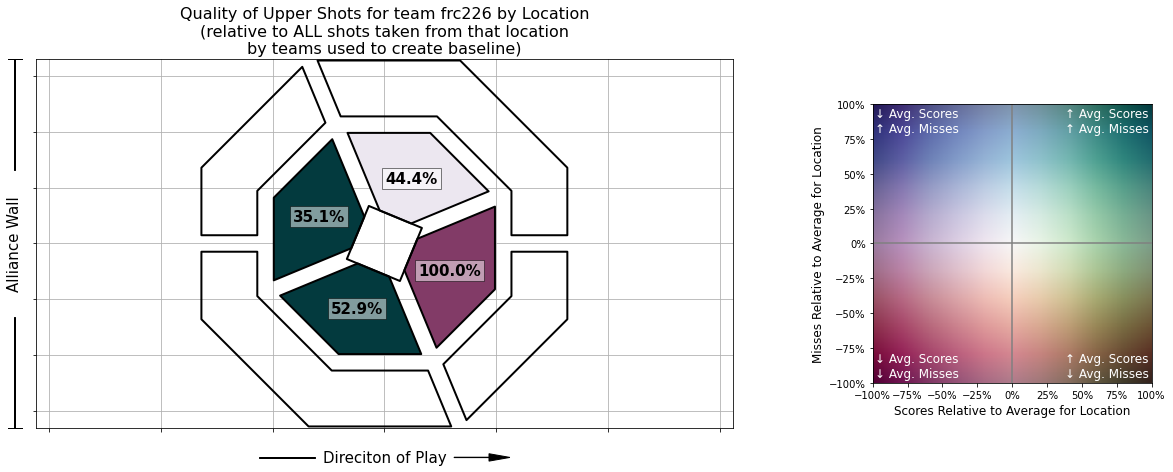

In [22]:
#Generate our plotting space with gridspec
fig = plt.figure(figsize=(20, 20))

gs = gridspec.GridSpec(3,3,height_ratios=[3, 10, 3], width_ratios= [10, 10, 10],
                       wspace = 0.5,hspace = 0.25)

# --------------- Plot shooting accuracy by location
# Shapes for choropleth mapping: 1-closest tarmac, 2-2nd closest tarmac
'''polygons = [Polygon([(-46.637,93.280),(-98.936,40.981),(-98.936,-32.982),(-29.580,-4.254),(-17.909, 23.924)]),
            Polygon([(-93.280, -46.637),(-40.981, -98.936), (32.982, -98.936),(4.254, -29.580),(-23.924, -17.909)]),
            Polygon([(93.280, 46.637),(40.981, 98.936),(-32.982, 98.936),(-4.254, 29.580),(23.924, 17.909)]),
            Polygon([(46.637,-93.280),(98.936,-40.981),(98.936,32.982),(29.580,4.254),(17.909, -23.924)]),
            Polygon([(-73.457,158.030),(-163.686,67.801),(-163.686,-67.801),(-67.801, -163.686),(59.801, -163.686),
                    (39.091,-113.686),(-47.090,-113.686),(-113.686,-47.090),(-113.686, 47.090),(-52.746,108.030)]),
            Polygon([(73.457,-158.030),(163.686,-67.801),(163.686,67.801),(67.801,163.686),(-59.801,163.686),
                    (-39.091,113.686),(47.090,113.686),(113.686,47.090),(113.686,-47.090),(52.746,-108.030)]),
            Polygon([(-33.580,-13.909),(-13.909, 33.580),(33.580,13.909),(13.909, -33.580)])]'''
polygons = [Polygon([(-46.637,93.280),(-98.936,40.981),(-98.936,-32.982),(-29.580,-4.254),
                     (-17.909, 23.924)]),    #Tarmac 1
            Polygon([(-93.280, -46.637),(-40.981, -98.936), (32.982, -98.936),(4.254, -29.580),
                     (-23.924, -17.909)]),    #Tarmac 2
            Polygon([(93.280, 46.637),(40.981, 98.936),(-32.982, 98.936),(-4.254, 29.580),
                     (23.924, 17.909)]),    #Tarmac 3
            Polygon([(46.637,-93.280),(98.936,-40.981),(98.936,32.982),(29.580,4.254),(17.909, -23.924)]),     #Tarmac 4
            Polygon([(-73.457,158.030),(-163.686,67.801),(-163.686,7.375),(-113.686,7.375),
                     (-113.686, 47.090),(-52.746,108.030)]),    #Outer 1
            Polygon([(-113.686,-7.375),(-163.686,-7.375),(-163.686,-67.801),(-67.801, -163.686),
                    (59.801, -163.686),(39.091,-113.686),(-47.090,-113.686),(-113.686,-47.090)]),    #Outer 2
            Polygon([(113.686,7.375),(163.686,7.375),(163.686,67.801),(67.801,163.686),(-59.801,163.686),(-39.091,113.686),
                     (47.090,113.686),(113.686,47.090)]),
            Polygon([(73.457,-158.030),(163.686,-67.801),(163.686,-7.375),(113.686,-7.375),
                     (113.686,-47.090),(52.746,-108.030),]),
            Polygon([(-33.580,-13.909),(-13.909, 33.580),(33.580,13.909),(13.909, -33.580)])]
polygon_txt_locs = [(-58.400, 24.190),(-24.190, -58.400),(24.190, 58.340),(58.400, -24.190),
                    (-100.000,100.00),(-100.000,-100.00),(100.000,100.000),(100.000,-100.00),(0.,0.)]
'''circles = [Circle((-83.936,34.767),10),
           Circle((-34.767,-83.936),10),
           Circle((34.767,83.936),10),
           Circle((83.936,-34.767),10),
           Circle((-138.686,22.375),10),
           Circle((-138.686,-22.375),10),
           Circle((138.686,22.375),10),
           Circle((138.686,-22.375),10),
           Circle((-5.791,13.981),10)]'''

uni_colors = plt.cm.RdYlGn(locs_data['scored_pct_by_loc'].to_numpy())
bi_colors, bi_z_plot = colorFromBivariateData(locs_data['missed_by_loc'].to_numpy(),
                                locs_data['scored_by_loc'].to_numpy(),
                                all_locs_data['missed_by_loc'].to_numpy(),
                                all_locs_data['scored_by_loc'].to_numpy())

print(f'bi_colors: {bi_colors}')

hatches = ['/'] * len(polygons)      # (!!!!broken!!!!) one 'none' for each polygon, defalt no hatch 
for idx in range(len(polygons)):
    attempts = locs_data.iloc[idx, locs_data.columns.get_loc('scored_by_loc')] +  \
                locs_data.iloc[idx, locs_data.columns.get_loc('missed_by_loc')]
    if(attempts == 0.0):
        hatches[idx] = '/'
        bi_colors[idx][3] = 0
        
#Figure gen for app UI
'''edge_colors = ["crimson","crimson","dodgerblue","dodgerblue","crimson","crimson","dodgerblue","dodgerblue","k"]
bi_colors = ["lightcoral","lightcoral","lightskyblue","lightskyblue","lightcoral",
          "lightcoral","lightskyblue","lightskyblue","white"]
'''
p1_kwargs={'hatch':hatches, 'facecolor':bi_colors, 'edgecolor':'k', 'linewidth':2}
p1 = PatchCollection(polygons,**p1_kwargs)
'''p2_kwargs={'hatch':hatches, 'facecolor':bi_colors, 'edgecolor':"k", 'linewidth':2}
p2 = PatchCollection(circles,**p2_kwargs)'''
ax0 = fig.add_subplot(gs[:, :-1])
ax0.set_aspect('equal')
ax0.add_collection(p1)
#ax0.add_collection(p2)

for idx, p in enumerate(polygon_txt_locs):
    scored = locs_data.iloc[idx, locs_data.columns.get_loc('scored_by_loc')]
    missed = locs_data.iloc[idx, locs_data.columns.get_loc('missed_by_loc')]
    if scored + missed != 0.0:
        ax0.text(p[0],p[1], f"{scored/(scored + missed)*100:.1f}%", \
                 verticalalignment='center', horizontalalignment='center', \
                 fontsize=15, fontweight='bold', \
                 bbox={'facecolor':"white", 'alpha': 0.5, 'pad': 3})
        
goal_dict = {0:"Unknown", 1:"Upper", 2:"Lower"}
ax0.set_title(f'Quality of {goal_dict[goal_to_analyze]} Shots for team {team} by Location\n(relative to ALL shots taken from that location\nby teams used to create baseline)', fontsize=16)
ax0.set_xlim([-312, 312]), ax0.set_ylim([-165, 165])
#ax0.set_xlim([-175, 175]), ax0.set_ylim([-175, 175])# figure gen for app UI
plt.grid(True)
ax0.set_axisbelow(True)
ax0.axes.xaxis.set_ticklabels([])
ax0.axes.yaxis.set_ticklabels([])
ax0.text(0.5, -0.1, 'Direciton of Play', \
        verticalalignment='bottom', horizontalalignment='center', \
        transform=ax0.transAxes, fontsize=15)
ax0.arrow(0.6, -0.08, .05, 0, transform=ax0.transAxes, head_width=.02, head_length=.03, fc='k', ec='k', clip_on = False)
ax0.arrow(0.4, -0.08, -.08, 0, transform=ax0.transAxes, head_width=0, head_length=0, fc='k', ec='k', clip_on = False)
ax0.text(-0.03, 0.5, 'Alliance Wall', verticalalignment='center', horizontalalignment='center', \
        transform=ax0.transAxes, fontsize=15, rotation=90)
ax0.arrow(-0.03, 0.7, 0, .3, transform=ax0.transAxes, head_width=.02, head_length=.0, fc='k', ec='k', clip_on = False)
ax0.arrow(-0.03, 0.3, 0, -.3, transform=ax0.transAxes, head_width=.02, head_length=.0, fc='k', ec='k', clip_on = False)
#Plot the overall the key to these bivariate shooting location miss vs score data
x_size,y_size = 200,200
xx, yy = np.mgrid[-x_size/2:x_size/2,-y_size/2:y_size/2]
C_map, zplot = colorFromBivariateData(xx,yy,xx,yy)     #the underlying colors are the bivariate key for the loc plot, nothing to to with the ax1 scatterplot
ax1 = fig.add_subplot(gs[1, -1])
ax1.set_aspect('equal')
ax1.imshow(C_map, origin='lower', extent=[-100,100,-100,100])
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.axhline(y=0, color="gray")
ax1.axvline(x=0, color="gray")
ax1.set_xlabel('Scores Relative to Average for Location',fontsize=12)
ax1.set_ylabel('Misses Relative to Average for Location', fontsize=12)
ax1.text(0.01, 0.01, '↓ Avg. Scores\n↓ Avg. Misses', \
        verticalalignment='bottom', horizontalalignment='left', \
        transform=ax1.transAxes, color='White',fontsize=12)
ax1.text(0.01, 0.99, '↓ Avg. Scores\n↑ Avg. Misses', \
        verticalalignment='top', horizontalalignment='left', \
        transform=ax1.transAxes, color='White',fontsize=12)
ax1.text(0.99, 0.01, '↑ Avg. Scores\n↓ Avg. Misses', \
        verticalalignment='bottom', horizontalalignment='right', \
        transform=ax1.transAxes, color='White',fontsize=12)
ax1.text(0.99, 0.99, '↑ Avg. Scores\n↑ Avg. Misses', \
        verticalalignment='top', horizontalalignment='right', \
        transform=ax1.transAxes, color='White',fontsize=12)



#----------- Plot o'all accuracy by match 
match_detail = pd.DataFrame()
#match_detail['scores'] = cycle_locs.groupby(['match_idx'])
#match_detail['misses'] = cycle_locs.groupby(['match_idx'])

#print(f"gamepieces scored by match:\n{match_detail}")
print(match_detail)
'''
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_aspect('equal')
#ax2.set_xlim(0,x_size-1), ax1.set_ylim(0,y_size-1)
#ax2.axline([0, 0], [1, 1], color='gray')
ax2.axhline(y=0, color="gray")
ax2.axvline(x=0, color="gray")
#ax2.scatter(cycle_detail['scores']-ref_mean_match_scores,cycle_detail['misses']-ref_mean_match_attempts, color="deepskyblue", s=60)
ax2.set_title('Departures from Mean Misses and Scores on a Per/Match Basis', fontsize=16)
ax2.set_xlabel('Scores'), ax2.set_ylabel('Attempts')
ax2.text(0.01, 0.01, 'Below Avg. Scores\nBelow Avg. Misses',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax2.transAxes, color='Black',fontsize=12)
ax2.text(0.01, 0.99, 'Below Avg. Scores\nAbove Avg. Misses',
        verticalalignment='top', horizontalalignment='left',
        transform=ax2.transAxes, color='Black',fontsize=12)
ax2.text(0.99, 0.01, 'Above Avg. Scores\nBelow Avg. Misses',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes, color='Black',fontsize=12)
ax2.text(0.99, 0.99, 'Above Avg. Scores\nAbove Avg. Misses',
        verticalalignment='top', horizontalalignment='right',
        transform=ax2.transAxes, color='Black',fontsize=12)'''

pca = PCA(n_components=2)
match_shooting_departures = cycle_detail[['scores','misses']].values.tolist()
match_shooting_departures.extend([[4,12],[3,10],[5,11]])
pca.fit(match_shooting_departures)
print(pca.explained_variance_ratio_)
print(np.array(match_shooting_departures).T[0],np.array(match_shooting_departures).T[1])
sns.scatterplot(np.array(match_shooting_departures).T[0],np.array(match_shooting_departures).T[1])